### <center> **Práctica 6: Diseño de filtros digitales**
### <center>**Bioseñales y sistemas**
#### <center>Maria Alejandra Escobar - C.C 1004425012
#### <center>Juan Manuel Martínez - C.C 1007739919

### CREACION DE LA SEÑAL

Proponga una secuencia sinusoidal x_e (n), con 0≤n≤1000, F_0=0,01Hz y F_s=25Hz. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico. El viaje de la señal hipotética x_e (n) a través de los diversos tejidos genera una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma:

<center>y_e (n)=αx_e (n-D)+w(n)



Donde α representa la amplitud, D es un retraso debido a la conducción a través de los diversos tejidos y w(n)  representa el ruido generado por la electrónica de los sistemas de adquisición. 


En principio se creó la función Seno que se propone en el enunciado, sin distorsión de ruido ni retrasos.

Text(0.5, 0, 'Tiempo (s)')

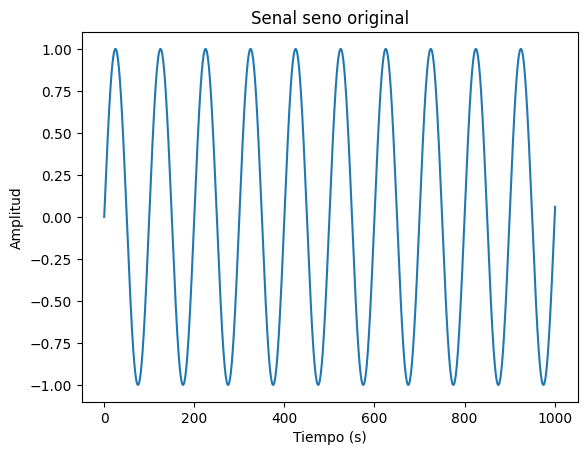

In [142]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

fs = 25
fo = 0.01
t = np.arange(0,1001, 1/fs)
xe = np.sin(2*np.pi*fo*t)
plt.plot(t,xe)
plt.title("Senal seno original")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

Genere las secuencias ficticias x_e (n) y y_e (n), implemente w(n)  como una secuencia de ruido Gaussiano con media cero y varianza σ^2=0,01, establezca α=0,8 y un retraso D=15 muestras. Grafique ambas señales.  


Text(0.5, 0, 'Tiempo (s)')

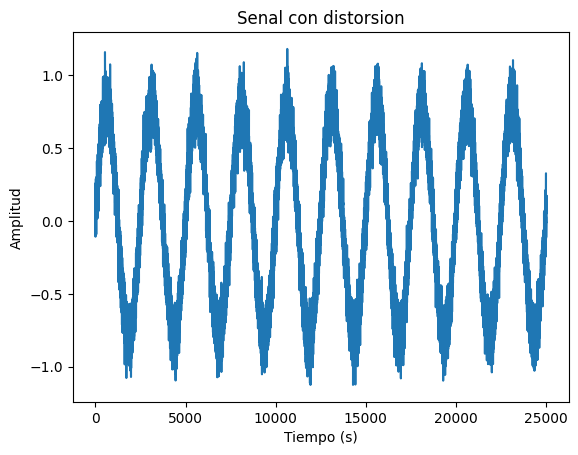

In [143]:
alpha = 0.8
retraso = 15
media = 0
varianza = 0.01
w = np.random.normal(media,np.sqrt(varianza),len(t))
xe_ret = np.sin(2*np.pi*fo*(t+(15/fs)))
ye = alpha*xe_ret + w
plt.plot(ye)
plt.title("Senal con distorsion")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

## Diseñe un filtro FIR pasa bajas para la señal y_e (n), con una frecuencia de corte de 1.25 muestras/s y orden 30.

¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.

In [144]:
orden = 30
wn_baja = 1.25/(fs/2)
wn_alta = 7.5/(fs/2)
pasaBaja_Fiir = signal.firwin(orden+1, wn_baja, pass_zero = 'lowpass',window='hamming')
pasaAltas_Fiir = signal.firwin(orden+1, wn_baja, pass_zero = 'highpass',window='hamming')
pasaBanda_Fiir = signal.firwin(orden+1,[wn_baja,wn_alta],pass_zero = 'bandpass', window='hamming')

La función Firwin puede diseñar diferentes tipos de filtros, entre ellos, pasa altas, pasa bajas, pasa bandas y rechaza bandas. Para ellos es necesario solamente entregarle el orden del filtro, la frecuencia de corte y el tipo de ventana con el que va a crear el filtro. La diferencia de un filtro pasa bajas con uno pasa altas y pasa bandas son algunos argumentos tales como el tipo de filtro o pass_zero, en el cual se debe intercambiar con el nombre del tipo de filtro que se requiere. En el caso de los filtros pasa banda se requiere una tupla con las dos frecuencias de corte, siendo siempre el primer elemento de la tupla la frecuencia de corte del pasa altas y el segundo elemento la frecuencia de corte del pasa bajas.

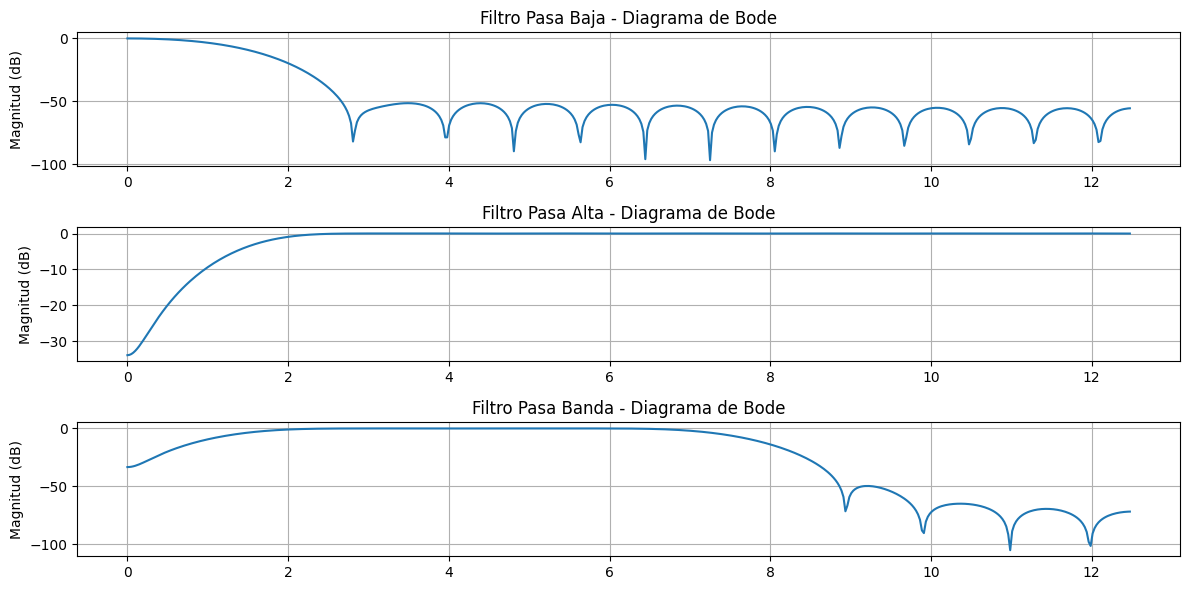

In [145]:
w_baja, h_baja = signal.freqz(pasaBaja_Fiir, fs=fs)
w_alta, h_alta = signal.freqz(pasaAltas_Fiir, fs=fs)
w_banda, h_banda = signal.freqz(pasaBanda_Fiir, fs=fs)

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(w_baja, 20 * np.log10(abs(h_baja)))
plt.title('Filtro Pasa Baja - Diagrama de Bode')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(w_alta, 20 * np.log10(abs(h_alta)))
plt.title('Filtro Pasa Alta - Diagrama de Bode')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(w_banda, 20 * np.log10(abs(h_banda)))
plt.title('Filtro Pasa Banda - Diagrama de Bode')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

plt.tight_layout()
plt.show()

Las gráficas generadas corresponden al comportamiento en frecuencia del filtro en magnitud. en ellos se puede observar que las frecuencias de corte estipuladas corresponden a puntos en la pendiente de atenuación. Así mismo, se observa que en la zona de rechazo hay un rizado de 50 db. Aún así, la atenuación es muy grande en los puntos máximos del rizado.

## Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios. 

In [146]:
bBajo, aBajo = signal.iirfilter(16+1, wn_baja, btype = 'lowpass', ftype='butter')
bAlto, aAlto = signal.iirfilter(16+1, wn_baja, btype = 'highpass', ftype='butter')
bBanda, aBanda = signal.iirfilter(16+1,[wn_baja,wn_alta], btype = 'bandpass', ftype='butter')

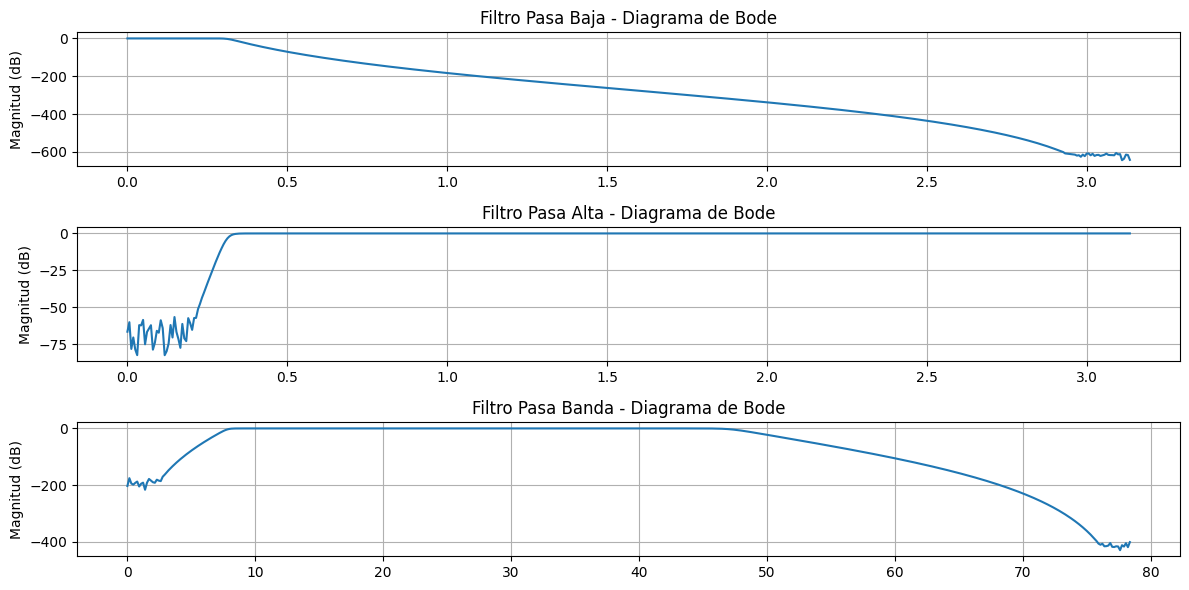

In [147]:
w_baja1, h_baja1 = signal.freqz(bBajo, aBajo)
w_alta1, h_alta1 = signal.freqz(bAlto, aAlto)
w_banda1, h_banda1 = signal.freqz(bBanda, aBanda)

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(w_baja1, 20 * np.log10(abs(h_baja1)))
plt.title('Filtro Pasa Baja - Diagrama de Bode')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(w_alta1, 20 * np.log10(abs(h_alta1)))
plt.title('Filtro Pasa Alta - Diagrama de Bode')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(w_banda1*fs, 20 * np.log10(abs(h_banda1)))
plt.title('Filtro Pasa Banda - Diagrama de Bode')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

plt.tight_layout()
plt.show()

Comparando los gráficos de bode obtenidos con el diseño de filtros FIIR y IIR se observa que los segundos tienen mejores pendientes de atenuación y menos rizado en la zona de rechazo, por lo cual pueden representar una ventaja a la hora de querer presición en el filtrado de una señal.

## FILTRADO

Pruebe los comandos lfilter y filtfilt utilizando la información entregada por el filtro pasa bajas FIR implementado anteriormente y la señal y_e (n)  ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia? ¿Es adecuado el orden del filtro usado? Analice.


Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas IIR implementado anteriormente y la señal y_e (n) ¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice. 


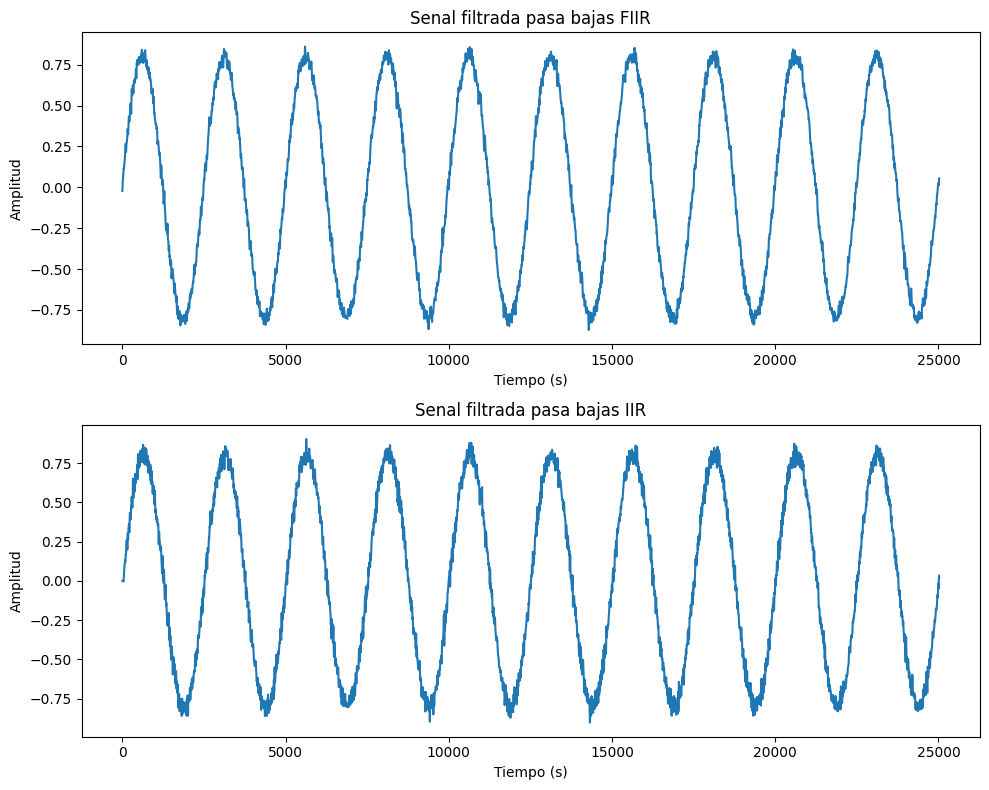

In [148]:
ye_fiir = signal.filtfilt(b=pasaBaja_Fiir,a=1,x=ye)
ye_iir = signal.lfilter(bBajo, aBajo,ye)

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(ye_fiir)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Senal filtrada pasa bajas FIIR')

plt.subplot(2,1,2)
plt.plot(ye_iir)
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Senal filtrada pasa bajas IIR')

plt.tight_layout()
plt.show()

## FILTRO FIR

Este filtro utiliza sólo el numerador, ya que esta técnica de diseño de filtros genera funciones causales, es decir, sólo dependen de valores de la entrada, o valores pasados. El denominador se refiere a los valores de la salida, o valores futuros, por lo cual para este tipo de filtros no se tienen en cuenta. La función filtfilt utiliza un algoritmo de doble filtrado, lo cual ayuda a corregir errores de fase, por lo cual la entrada y la salida corresponden de muy buena manera, siendo útil el filtro para la disminución del ruido Gausiano introducido. Aún así, todavía está lejos de llegar a la señal generada sin ruido. Esto por los filtros presentan distorsiones en banda pasante y en banda de rechazo, como ya se analizó en los diagramas de bode de cada uno de ellos. En el caso del orden del filtro es adecuado, ya que la penidente de atenuación es pequeña y se logra un buen resultado de filtrado en la eliminación del ruido Gaussiano. Así mismo, al probarse el filtrado con grados más altos de filtro, no se obtuvieron resultados mucho mejores que el presentado, por lo cual se considera adecuado. 

## FILTRO IIR

En el diseño de los filtros IIR el sistema incluye una realimentación con la salida, por lo cual se incluye en su diseño el denominador, el cual representa los valores de la salida o valores futuros. Es por esto que el diseño de los filtros IIR necesita tant valores de la entrada como los valores de la salida y dos matrices de coeficientes correspondinetes al numerador y al denominador. Al realizar este filtro bajo las mismas condiciones y filtrar la señal se obtuvo que el sistema creado era inestable, ya que no producía ninguan salida a partir de la entrada. Es por esto que se debió disminuir el orden del filtro y encontrar por iteraciones un punto en el que el sistema fuera estable y arrojara un buen resultado. 

Los filtros IIR al tener un componente en el numerador tienen la característica que no siempre son estables, por lo cual se debe ser muy cuidadoso en la selección del grado de estos para obtener los resultados deseados.

## APLICACION

Cargue la señal señal_filtros.txt adquirida a una frecuencia de muestreo de 500 Hz. Extraiga y trabaje con el canal 1 de la señal.

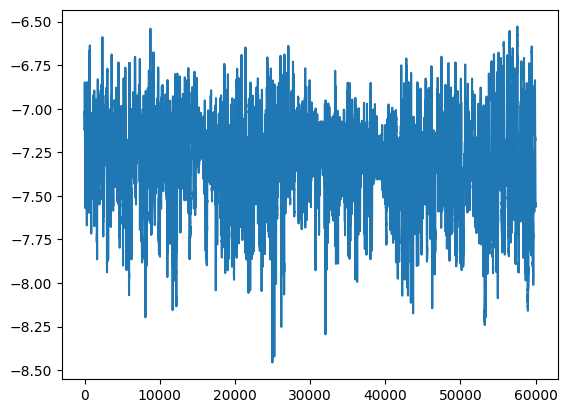

In [149]:
signal = np.loadtxt('senal_filtros.txt')
canal_1 = signal[:,0]
canal_1
plt.plot(canal_1)

Realice un análisis frecuencial con la función que permite calcular el periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice. 

C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_6644\3394426001.py:6: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  window = hamming(window_size)


<function matplotlib.pyplot.show(close=None, block=None)>

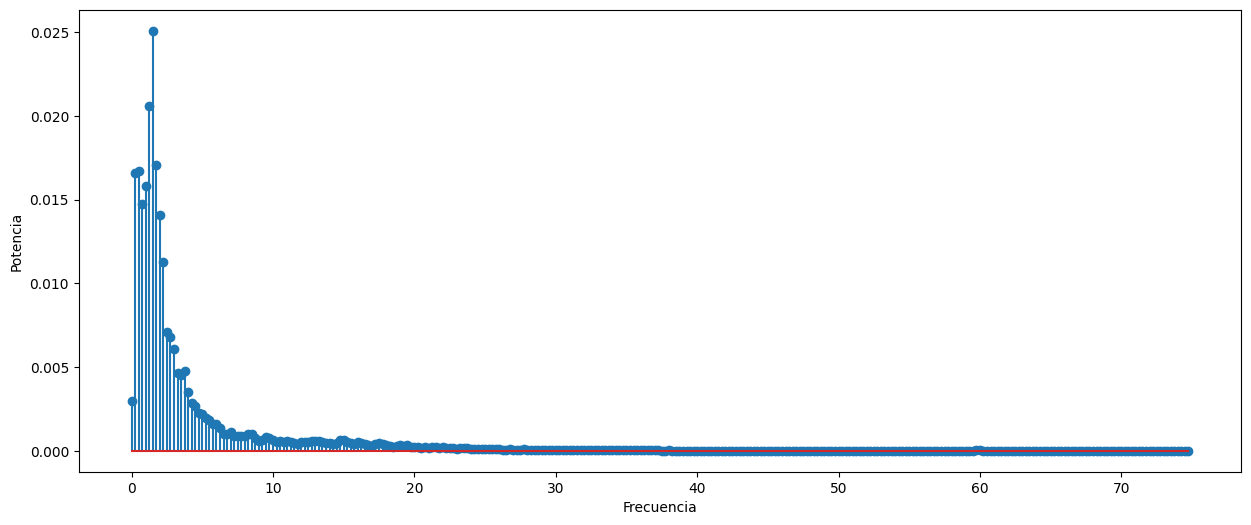

In [150]:
from scipy.signal import welch, hamming

fs = 500
window_size = 2000 # Tamaño de la ventana de 1000 muestras
overlap = window_size // 2  # Solapamiento del 50%
window = hamming(window_size)
#Periodograma de Welch
f, pxx = welch(canal_1, fs=fs, window=window, nperseg=window_size, noverlap=overlap)

plt.figure(figsize=(15,6))
plt.stem(abs(f[0:300]), pxx[0:300])
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.show

En el periodograma de Welch obtenido se observan frecuencias bajas con alta potencia, las cuales corresponden a la señal presentada, sin embargo, aunque se observa muy poca presencia, existen pequeños picos de frecuencias por encima de 25 Hz, y en 60 Hz se observa un pequeño pico que podría contaminar la señal.

In [157]:
import scipy.signal as signal
orden = 3.3/(10/500)
orden = int(orden)
Fiir_pasaBajas = signal.firwin(orden+2, 40/(500/2), pass_zero = 'lowpass',window='hamming')

Al observar el periodograma y la presencia de la mayoría de los picos de frecuencia entre 0 y 15 Hz, se aplicó un filtro pasa bajas con frecuencia de corte de 40 Hz y una banda de pendiente de atenuación de 10 Hz. Esto con el objetivo de obtener la atenuación máxima del filtro a 60 Hz y eliminar cualquier interferencia a alta frecuencia. 

<function matplotlib.pyplot.show(close=None, block=None)>

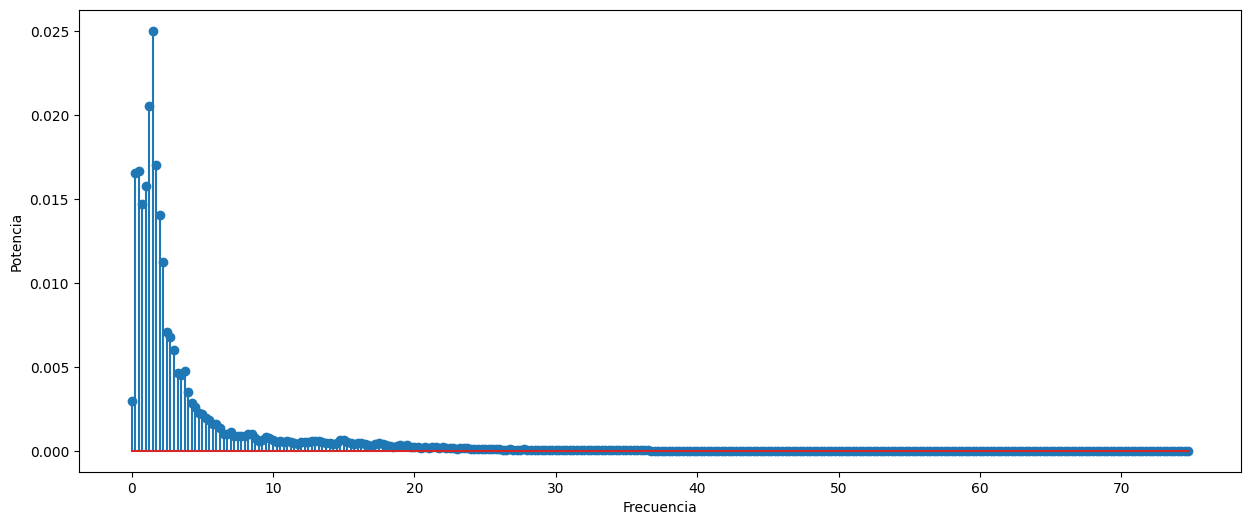

In [158]:
canal_1_filtrado = signal.filtfilt(b=Fiir_pasaBajas,a=1,x=canal_1)
f, pxx = welch(canal_1_filtrado, fs=fs, window=window, nperseg=window_size, noverlap=overlap)

plt.figure(figsize=(15,6))
plt.stem(abs(f[0:300]), pxx[0:300])
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.show


En el nuevo periodograma se observa que se eliminaron los pequeños picos d efrecuencias por encima de 40 Hz, por lo cual aunque las diferencias son pequeñas, se nota la eliminación de ruido a alta frecuencia.

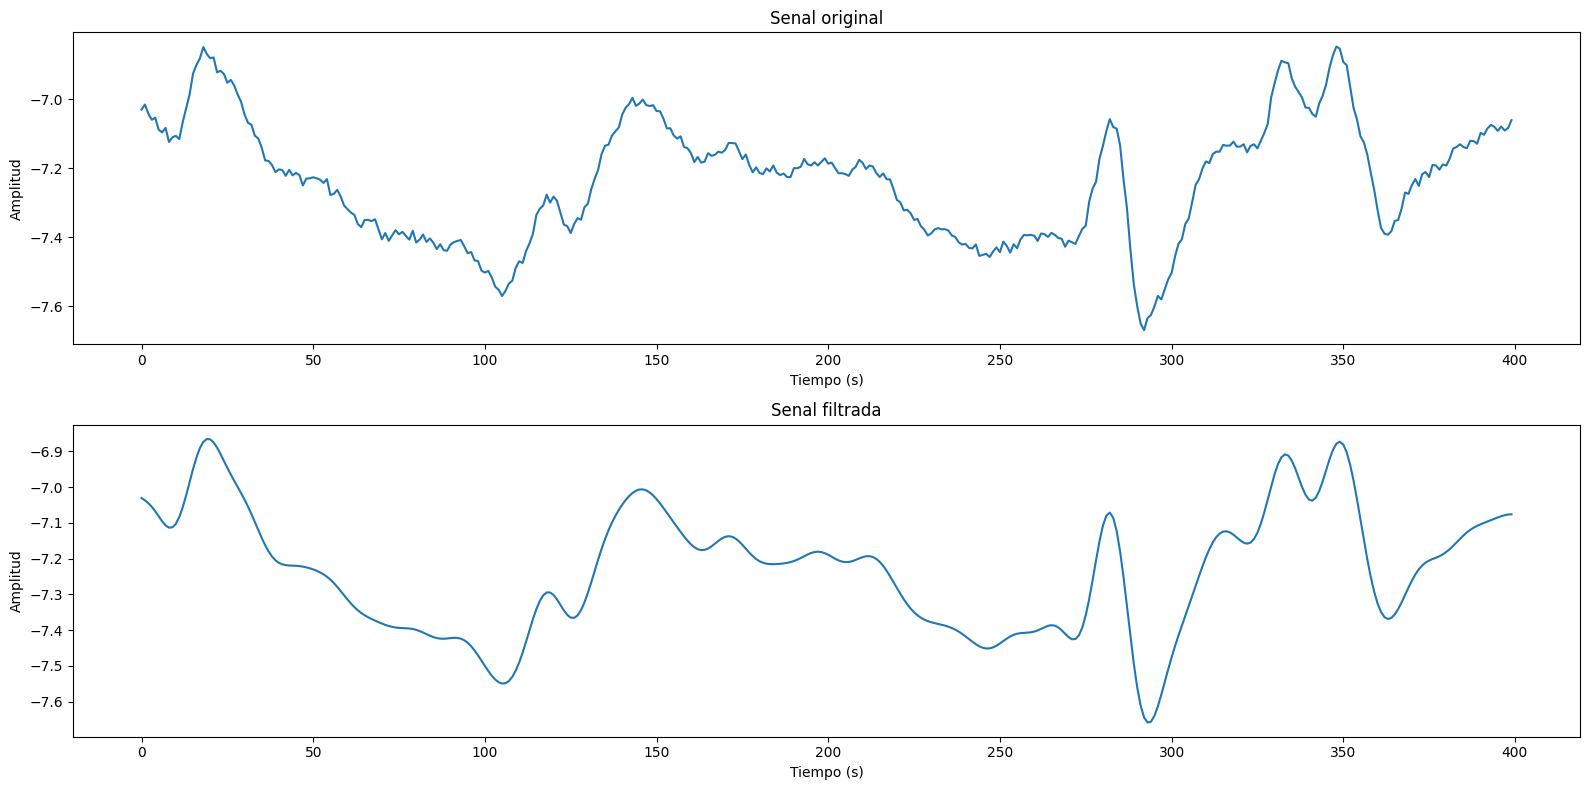

In [159]:
plt.figure(figsize=(16,8))

plt.subplot(2,1,1)
plt.plot(canal_1[0:400])
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Senal original')

plt.subplot(2,1,2)
plt.plot(canal_1_filtrado[0:400])
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title('Senal filtrada')

plt.tight_layout()
plt.show()

Por ultimo, al observar una porción de la señal de 400 muestras, se observa que el ruido a alta frecuencia que generaba picos que dañaban la señal se han eliminado, logrando una señal suavizada.


##  CONCLUSIONES


Los filtros digitales son una herramienta muy importante en el procesamiento de señales, ya que permiten obtener información más acercada a la realidad de los fenómenos, incluso, un buen filtrado de los datos y señales con las que se trabajan, entrega así mismo unos resultado acertados de los que se puede extraer información muy valiosa. 

Para el éxito de este proceso es indispensable tener varias cosas en cuenta, entre ellas la selección del tipo de filtro. Tanto los filtros FIR como los IIR tienen sus propias ventajas y desventajas. Los filtros FIR son más fáciles de diseñar y ofrecen una respuesta de fase lineal, lo que es crucial en aplicaciones donde la distorsión en la fase puede afectar la interpretación de la señal biológica. Por otro lado, los filtros IIR son más eficientes computacionalmente y pueden lograr una mayor selectividad en la frecuencia con un orden de filtro más bajo.

Además, es importante escoger un orden apropiado del filtro, un orden demasiado bajo puede resultar en una respuesta en frecuencia insuficiente para eliminar las componentes no deseadas de la señal, mientras que un orden demasiado alto puede introducir artefactos y distorsión en la señal.

Herramientas como los periodogramas de Welch son muy útiles para determinar las frecuencias de corte a las que se deben aplicar los filtros digitales, ya que ofrecen el espectro con el valor en potencia de las frecuencias presentes en la señal. 

## REFERENCIAS
[1] https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html

[2] https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirfilter.html